<a href="https://colab.research.google.com/github/chanhyeong00/machine_learning_study/blob/main/pytorch/%EC%8B%AC%ED%99%942(%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A6%9D%EA%B0%95%20%EB%B0%8F%20%EB%B3%80%ED%99%98-%EC%9D%B4%EB%AF%B8%EC%A7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 데이터

이미지 데이터 증강은 객체 검출 및 인식, 이미지 분류와 같은 이미지 처리 모델을 구성할 때 데이터 세트의 크기를 쉽게 늘리기 위해 사용된다.

방법은 크게 회전, 대칭, 이동, 크기 조정 등이 있다.

이 책에서는 torchvision 라이브러리와 이미지 증강(imgaug)라이브러리를 활용해 증강한다.

In [ ]:
pip install imgaug

In [2]:
from matplotlib import pyplot as plt

## 변환 적용 방법(Compose)

torchvision 라이브러리의 변환(transforms) 모듈을 통해 수행할 수 있다.

여러 모델 매개변수를 묶어주는 Sequential 과 같은 역할을 하는 통합(Compose) 클래스를 함께 사용해 증강을 적용한다.

다음은 통합 클래스 사용 방법을 보여준다

In [ ]:
from PIL import Image
from torchvision import transforms

transform = transforms.Compose(
    [
        transforms.Resize(size=(512, 512)),
        # 텐서화 클래스
        transforms.ToTensor() # PIL.Image 형식을 Tensor 형식으로 변환
        # [0~255] 범위 픽셀값을 [0.0~1.0] 사이의 값으로 최대최소정규화(min-max normalization) 수행
        # [높이, 너비, 채널] 입력 데이터를 [채널, 높이, 너비] 형태로 변환
    ]
)

image = Image.open('cat.jpg')
transformed_image = transform(image)

print(transformed_image.shape)

torch.Size([3, 512, 512])


## 회전 및 대칭(RandomRotation, RandomHorizontalFlip, RandomVerticalFlip)


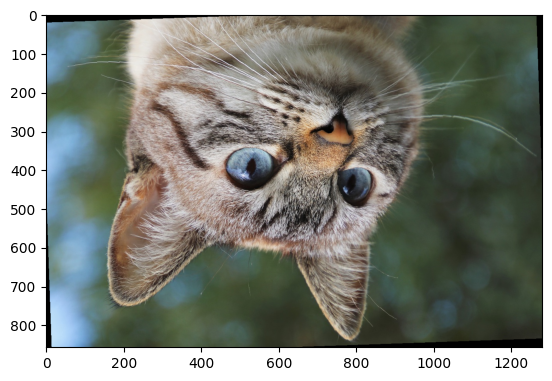

In [ ]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [   # 이미지를 -30~30도 사이로 회전시키며 수평대칭과 수직대칭을 50% 확률로 적용
        # RandomRotation는 입력된 각도를 음수~양수 사이의 각도로 변환
        # 임의 범위 설정하려면 [-30, 90] 처럼 시퀀스 형태로 입력
        transforms.RandomRotation(degrees=30, expand=False, center=None),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5)
    ]
)

image = Image.open("cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

이미지 회전하는 과정에서 여백이 생성될 수 있는데, **확장(expand)을 True**로 할당하면 여백 생성이 되지 않음.

**center**는 시퀀스 형태로 전달하며 입력하지 않으면 왼쪽 상단을 기준으로 회전한다.



무작위대칭 클래스(RandomHorizontalFlip, RandomVerticalFlip) 는 수행확률(p)를 활용해 대칭 여부 설정.

0.5의 경우 50% 확률로 대칭 수행. 0.0으로 확률 입력하면 대칭 수행 x

## 자르기 및 패딩(RandomCrop, Pad)

객체가 존재하는 위치로 이미지를 잘라 불필요한 특징을 감소시키거나 패딩을 주어 이미지 크기를 동일한 크기로 맞춘다.

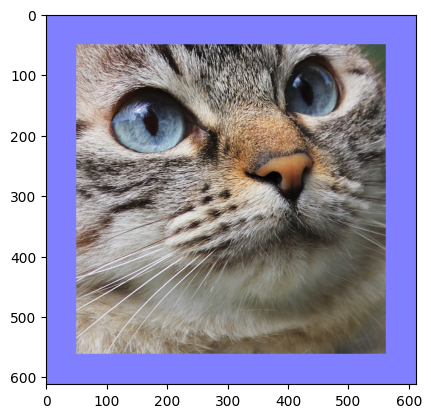

In [ ]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        # 정수나 시퀀스 형태로 값을 입력 가능(정수면 정사각형 시퀀스는 (높이, 너비))
        transforms.RandomCrop(size=(512, 512)),
        # 이미지 테두리에 특정한 방식이나 고정값으로 이미지 확장
        # 패딩을 50으로 했으므로 위아래, 양옆 50씩 적용 -> (612, 612) 크기의 이미지로 반환
        # 패딩 방식은 constant(상수)로 입력해 RGB(127, 127, 255)로 테두리 생성
        transforms.Pad(padding=50, fill=(127, 127, 255), padding_mode="constant")
    ]
)

image = Image.open("cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

패딩 방식을 반사(relflect)나 대칭(symmetric)으로 준다면 입력한 RGB는 무시되며 이미지의 픽셀값을 반사하거나 대칭해 생성한다.


## 크기 조정(Resize)

수집된 이미지 데이터는 모두 동일한 크기의 이미지로 수집되거나 편집하기가 어렵다.

이미지 처리 모델 학습을 원활하게 진행하기 위해서는 학습 데이터에 사용되는 이미지의 크기가 모두 일정해야 한다.



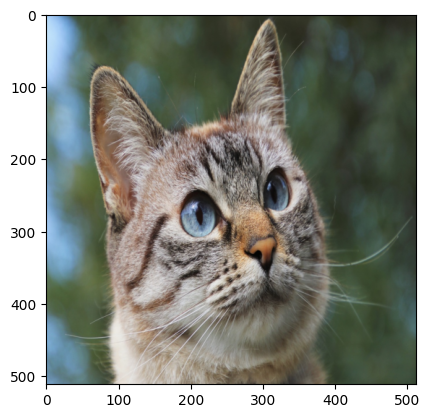

In [ ]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.Resize(size=(512, 512))
    ]
)

image = Image.open("cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

정수로 크기를 입력받는 경우 높이나 너비 중 크기가 더 작은 값에 비율을 맞춰 크기가 수정된다.

예를 들어 (500,400)일 때 transforms.Resize(size=300)으로 변환하면
(300*500 / 400, 300) = (375, 300)으로 크기 수정

특별한 경우가 아니라면 위처럼 (h,w) 시퀀스 형태로  전달(보편적으로 정사각형으로 데이터 정규화)

## 변형

이미지를 변형하는 경우 기하학적 변환(Geometric Transform)을 통해 이미지 변경한다.

- 기하학적 변환이란 인위적으로 확대, 축소, 위치 변경, 회전, 왜곡하는 등 이미지의 형태를 변환하는 것을 의미. 크게 아핀 변환(Affine Transformation), 원근 변환(Perspective Transformation)이 있다

-  아핀 변환(Affine Transformation): 2x3 행렬을 사용하며 행렬 곱셈에 벡터 합을 활용해 표현할 수 있는 변환을 의미
- 원근 변환(Perspective Transformation): 3x3 행렬을 사용하며, 호모그래피(Homography)로 모델링할 수 있는 변환을 의미.




### 아핀 변환(RandomAffine)

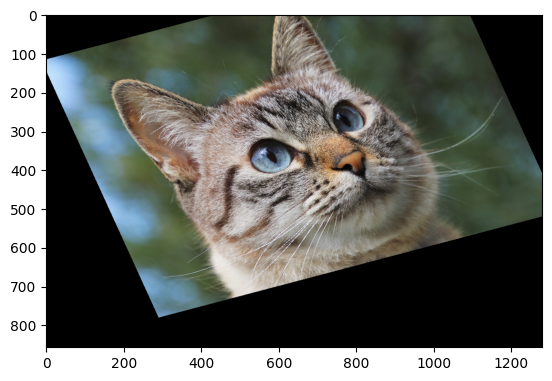

In [ ]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        # 각도, 이동, 척도(scale),전단(shear)
        transforms.RandomAffine(
            degrees=15, translate=(0.2, 0.2),
            scale=(0.8, 1.2), shear=15
        )
    ]
)

image = Image.open("cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

## 색상 변환(ColorJitter)

이미지 데이터의 특징은 픽셀값의 분포나 패턴에 크게 좌우된다. 앞선 변형들은 이러한 분포나 패턴을 비틀어 보간해 데이터를 증간한다고 볼 수 있다.

그러나 채도(Saturation), 명도(Brightness), 대비(Contrast) 등은 크게 변경되지 않는다.

모델이 이미지를 분석할 때 특정 색상에 편향되지 않도록 픽셀값을 변환하거나 정규화하면 모델을 더 일반화해 분석 성능을 향상시키고 학습 시간을 단축할 수 있다.

**색상 변환 빛 정규화**

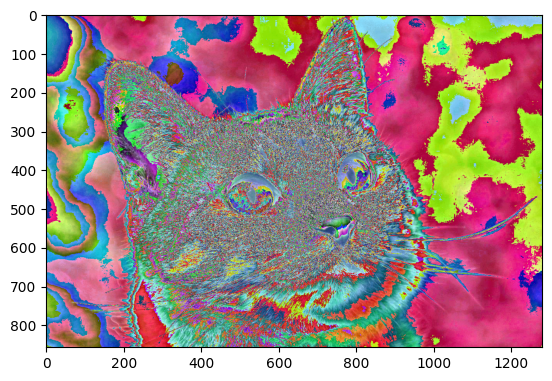

In [ ]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        # 색상변환 클래스(ColorJitter)는 밝기, 대비, 채도, 색상(hue) 변환
        transforms.ColorJitter(
            brightness=0.3, contrast=0.3,
            saturation=0.3, hue=0.3
        ),
        transforms.ToTensor(),
        # 평균과 표준편차를 활용해 정규화
        transforms.Normalize(
            mean = [0.485, 0.456, 0.406],
            std = [0.229, 0.224, 0.225]
        ),
        transforms.ToPILImage()
    ]
)

image = Image.open("cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

정규화를 수행하는데, 본래의 픽셀값을 확인하고자 한다면 수식을 반대로 적용하는 역정규화(Denormalization)을 수행한다.

## 노이즈

이미지 처리 모델은 주로 합성곱 연산을 통해 학습을 진행한다.

픽셀값에 따라 특징을 추출하는 매개변수가 크게 달라질 수 있다.

- 노이즈 추가도 특정 픽셀값에 편향되지 않도록 임의의 노이즈를 추가해 모델의 일반화 능력을 높이는 데 사용된다.

- 또한 학습에 직접 포함되지 않더라도 테스트 데이터에 노이즈를 추가해 일반화 능력이나 강전성(Robustness)을 평가하는 데 사용된다.

In [6]:
import numpy as np
np.bool = np.bool_

위의 코드로 밑의 오류 해결

AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:



(857, 1280, 3) uint8


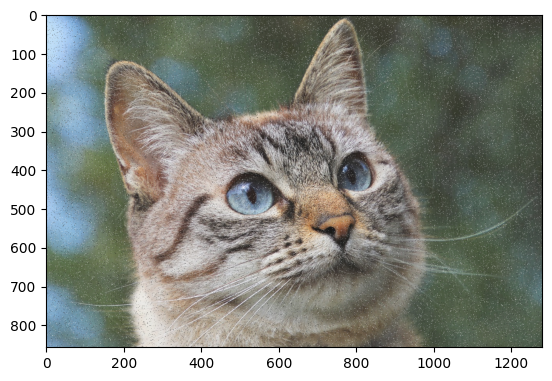

In [10]:
import numpy as np
from PIL import Image
from torchvision import transforms
from imgaug import augmenters as iaa # 이미지 증강 클래스


class IaaTransforms:
    def __init__(self):
        self.seq = iaa.Sequential([
            # 점잡음(Salt and pepper noise)
            iaa.SaltAndPepper(p=(0.03, 0.07)),
            # 빗방울 레이어
            iaa.Rain(speed=(0.3, 0.7))
        ])# 출력값 넘파이 ndarray

    def __call__(self, images):
        images = np.array(images) # PIL 이미지를 ndarray 형식으로 변환
        print(images.shape, images.dtype)
        augmented = self.seq.augment_image(images) # 증강 적용
        return Image.fromarray(augmented) # 다시 PIL.Image 형식으로 변환


transform = transforms.Compose([
    IaaTransforms() # 토치비전 형식은 PIL.Image나 Tensor 형식으로 증강 적용
])

image = Image.open("cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

## 컷아웃 및 무작위 지우기

컷아웃(Cutout)은 이미지에서 임의의 사각형 영역을 삭제하고 0의 픽셀값으로 채우는 방법이며, 무작위 지우기(Random Erasing)는 임의의 사각형 영역을 삭제하고 무작위 픽셀값으로 채우는 방법이다.

컷아웃은 동영상에서 폐색 영역(Occlusion)에 대해 모델이 더 강건하게 해주며, 무작위 지우기는 일부 영역이 누락되거나 잘렸을 때 더 강건한 모델을 만들 수 있게 해준다.

두 방법 모두 이미지의 객체가 일부 누락되더라도 모델을 견고하게 만드는 증강 방법

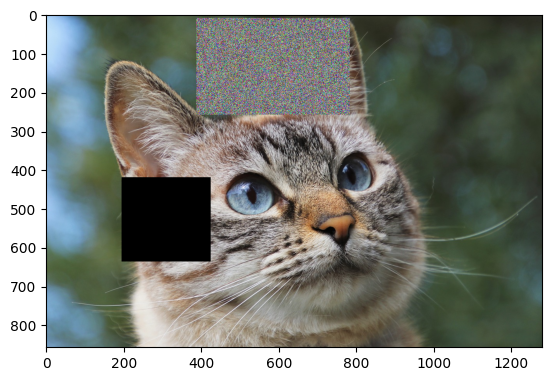

In [12]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose([
    # RandomErasing 클래스는 Tensor 형식만 지원되므로 텐서 형식으로 변환
    transforms.ToTensor(),
    # RandomErasing value=0으로 하면 컷아웃 방법
    transforms.RandomErasing(p=1.0, value=0),
    # random으로 하면 무작위지우기 방법
    transforms.RandomErasing(p=1.0, value='random'),
    transforms.ToPILImage() # PIL 변환
])

image = Image.open("cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

## 혼합 및 컷믹스

혼합(Mixup)은 두 개 이상의 이미지를 혼합(Blending)해 새로운 이미지를 생성하는 방법이다. 픽셀값을 선형으로 결합해 새 이미지 생성.

생성된 이미지는 두 개 이미지가 겹쳐 흐릿한 형상을 지니게 된다.

혼합 방식으로 이미지 데이터를 증강해 학습하면 레이블링이 다르게 태깅돼 있어도 더 낮은 오류를 보이며,

이미지를 혼합했기 때문에 **다중 레이블(Multi-label)** 문제에 대해서도 더 견고한 모델을 구성할 수 있음

컷믹스(CutMix)는 이미지 패치(patch) 영역에 다른 이미지를 덮어씌우는 방법이다. 이미지 영역을 잘라내고 붙여넣기(Cut and paste)하는 방법으로 볼 수 있다.

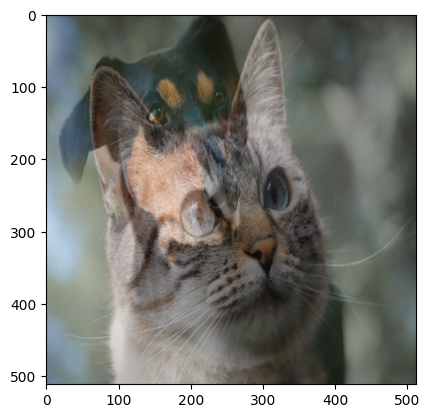

In [3]:
import numpy as np
from PIL import Image
from torchvision import transforms
from imgaug import augmenters as iaa # 이미지 증강 클래스


class Mixup:
    def __init__(self, target, scale, alpha=0.5, beta=0.5):
        self.target = target # 혼합하려는 이미지
        self.scale = scale # 이미지 크기 조절
        self.alpha = alpha # 각각 이미지의 혼합 비율
        self.beta = beta

    def __call__(self, image):
        image = np.array(image) # 넘파이 ndarray로
        target = self.target.resize(self.scale) # scale 만큼 사이즈 조절
        target = np.array(target) # 타겟 이미지도 크기 동일하게
        mix_image = image * self.alpha + target * self.beta # 둘이 비율을 맞춰 합침
        return Image.fromarray(mix_image.astype(np.uint8)) # 다시 PIL.Image로


transform = transforms.Compose(
    [
        transforms.Resize((512, 512)),
        Mixup(
            target=Image.open("dog.jpg"),
            scale=(512, 512),
            alpha=0.5,
            beta=0.5
        )
    ]
)

image = Image.open("cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)